In [1]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [2]:
from sklearn.metrics import classification_report

In [3]:
import pandas as pd
df=pd.read_csv("source_Xshenghuo.csv",encoding="utf-8")

df=df.dropna(axis=0)


In [4]:
df.shape

(8000, 22)

In [5]:
dfnew=pd.read_csv("source_y.csv",encoding="utf-8")

df=pd.concat([df,dfnew],axis=1)

df["happiness"].value_counts()

df["happiness"]=df["happiness"].map({1:0,2:1,3:2,4:3,5:4})
df=pd.concat([df[df["happiness"]==3].sample(frac=0.3),df[df["happiness"]!=3]],axis=0)
label=df["happiness"]
df["newcol_1"]=1
df["newcol_2"]=0
del df["happiness"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.2, random_state=42)

In [6]:
col=[]
for i in df.columns:
    col.append(i.split("_")[0])

import numpy as np
l=[]
first=0
last=0
colname=[]
for ind,i in enumerate(col):
    last+=1
    if last==len(col):
         
         print (df[df.columns[first:last]])
         colname.append(df.columns[first:last][0][:-2])
         l.append(np.argmax(df[df.columns[first:last]].values,axis=1))
         break
    if col[last]!=col[last-1]:
         print (df[df.columns[first:last]])
         colname.append(df.columns[first:last][0][:-2])
#          print (np.argmax(df[df.columns[first:last]].values,axis=1).max())
         l.append(np.argmax(df[df.columns[first:last]].values,axis=1))
         first=last
         last=last+1
         
#          break

      socialize_1  socialize_2  socialize_3  socialize_4  socialize_5
3997            0            1            0            0            0
1319            0            0            1            0            0
276             0            0            1            0            0
997             0            1            0            0            0
6046            0            0            1            0            0
...           ...          ...          ...          ...          ...
7987            0            0            1            0            0
7992            0            1            0            0            0
7995            0            0            0            1            0
7996            0            0            0            1            0
7998            0            0            1            0            0

[4627 rows x 5 columns]
      relax_1  relax_2  relax_3  relax_4  relax_5
3997        0        0        0        1        0
1319        0        0        0    

In [7]:
colname

['socialize', 'relax', 'learn', 'leisure_mean_cut', 'media_mean_cut', 'newcol']

In [24]:
colname[3]='leisure'
colname[4]='media'

In [25]:
colname

['socialize', 'relax', 'learn', 'leisure', 'media', 'newcol']

In [8]:
import pandas as pd

dfemd=pd.DataFrame()

embed_num=[]
for ind,i in enumerate(l):
    dfemd[ind]=i
    embed_num.append(len(dfemd[ind].unique())+2)

import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras import *
import numpy as np
import os
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dense, Input, Dropout, Bidirectional

from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import re
from tensorflow.keras.callbacks import Callback
import tensorflow
from tensorflow.keras.models import load_model
from sklearn import metrics
from sklearn.model_selection import KFold


def get_deep_wide_net():
    embedall=[]
    for ind,i in enumerate(dfemd.columns):
         embedall.append(Embedding(100, 128, input_length=1,
                      trainable=True))

    len(embedall)

    input1 = Input(shape=(X_train.shape[1], )) #模型的入口,设置输入的维度
    embedl=[]
    for i in range(len(embedall)):
        embedl.append(Input(shape=(1,)))

    l=[]
    for i in range(len(embedl)):
        l.append(embedall[i](embedl[i]))

    embedcat=Concatenate()(l)

    embedcat=Dense(128,activation="relu")(embedcat)

    floatdense=Dense(128)(input1)
    embedcatnew=Flatten()(embedcat)

    last=Concatenate()([embedcatnew,floatdense])
    output1=Dense(128)(last)
    output = Dense(5, activation='softmax')(output1)#softmax层

    model = Model(inputs=[input1]+embedl, outputs=output)
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])#定义损失函数，优化器，评分标准
    model.summary()
    return model

/Users/kongmiao/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/kongmiao/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/kongmiao/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/kongmiao/opt/anaconda3/lib/python3.7/site-packages/ten

In [9]:
from sklearn import metrics
recal_all=[]
pre_all=[]
f1_all=[]
acc_all=[]
f1_micro=[]

t_recal_all=[]
t_pre_all=[]
t_f1_all=[]
t_acc_all=[]
t_f1_micro=[]
k=5
kf = KFold(n_splits=k, shuffle=True)
#     tmppre=np.zeros(y.shape)
ind=0
for (train, test) in  kf.split(df.values):
        print ("fold",ind,"start")
        X_train=df.values[train]
        y_train=label.values[train]
        emd_train=dfemd.values[train]
        emd_test=dfemd.values[test]
        train_all=[]
        train_all.append(X_train)
        for ind in range(emd_train.shape[1]):
            train_all.append(np.expand_dims(emd_train[:,ind],axis=1))
            
       
        X_test=df.values[test]
        testall=[]
        testall.append(X_test)
        for ind in range(emd_test.shape[1]):
            testall.append(np.expand_dims(emd_test[:,ind],axis=1))
#         break
        y_test=label.values[test]
        X_train=X_train.reshape(X_train.shape[0],X_train.shape[1])
        X_test=X_test.reshape(X_test.shape[0],X_test.shape[1])
        
        callbacks = [EarlyStopping(monitor='val_acc', verbose=1, patience=1000),
             ModelCheckpoint("model_wide_class_{}.hdf5".format(ind), monitor='val_acc',
                             mode='max', verbose=0, save_best_only=True,save_weights_only=True)]
        model_new = get_deep_wide_net()

        model_new.fit(train_all, y_train, epochs=20, batch_size=16, validation_data=(testall, y_test) ,callbacks=callbacks)
        model_new.load_weights("model_wide_class_{}.hdf5".format(ind)) #加载最优模型
        ypre=np.argmax(model_new.predict(testall),axis=-1)
        tmpacc=accuracy_score(y_test,ypre)
        tmppre=precision_score(y_test,ypre,average="macro")
        tmprecal=recall_score(y_test,ypre,average="macro")
        tmpf1=f1_score(y_test,ypre,average="macro")
        tmpf1_mic=f1_score(y_test,ypre,average="micro")
        print ("fold_{} acc: {} precision: {} recall : {} ,mac f1: {} ,mic f1: {}".format(ind,tmpacc,tmppre,tmprecal,tmpf1,tmpf1_mic))
        print ("test reprot: ",classification_report(y_test,ypre,digits=4))
        recal_all.append(tmprecal)
        acc_all.append(tmpacc)
        f1_all.append(tmpf1)
        pre_all.append(tmppre)
        f1_micro.append(tmpf1_mic)
        ind+=1

        ypre=np.argmax(model_new.predict(train_all),axis=-1)
        tmpacc=accuracy_score(y_train,ypre)
        tmppre=precision_score(y_train,ypre,average="macro")
        tmprecal=recall_score(y_train,ypre,average="macro")
        tmpf1=f1_score(y_train,ypre,average="macro")
        tmpf1_mic=f1_score(y_train,ypre,average="micro")
        print ("fold_{} train_acc: {} train_precision: {} train_recall : {},mac f1: {} ,mic f1: {}".format(ind,tmpacc,tmppre,tmprecal,tmpf1,tmpf1_mic))
        print ("train reprot: ",classification_report(y_train,ypre,digits=4))
        t_recal_all.append(tmprecal)
        t_acc_all.append(tmpacc)
        t_f1_all.append(tmpf1)
        t_pre_all.append(tmppre)
        t_f1_micro.append(tmpf1_mic)
    
print ("max acc:{}".format(max(acc_all)))
print ("min acc:{}".format(min(acc_all)))
print ("mean acc:{}".format(sum(acc_all)/5))


print ("max precision:{}".format(max(pre_all)))
print ("min precision:{}".format(min(pre_all)))
print ("mean precision:{}".format(sum(pre_all)/5))

print ("max recall:{}".format(max(recal_all)))
print ("min recall:{}".format(min(recal_all)))
print ("mean recall:{}".format(sum(recal_all)/5))



print ("max mac f1:{}".format(max(f1_all)))
print ("min mac f1:{}".format(min(f1_all)))
print ("mean mac f1:{}".format(sum(f1_all)/5))

print ("max mic f1:{}".format(max(f1_micro)))
print ("min mic f1:{}".format(min(f1_micro)))
print ("mean mic f1:{}".format(sum(f1_micro)/5))


print ("train max acc:{}".format(max(t_acc_all)))
print ("train min acc:{}".format(min(t_acc_all)))
print ("train mean acc:{}".format(sum(t_acc_all)/5))



print ("train max precision:{}".format(max(t_pre_all)))
print ("train min precision:{}".format(min(t_pre_all)))
print ("train mean precision:{}".format(sum(t_pre_all)/5))


print ("train max recall:{}".format(max(t_recal_all)))
print ("train min recall:{}".format(min(t_recal_all)))
print ("train mean recall:{}".format(sum(t_recal_all)/5))


print ("train max mac f1:{}".format(max(t_f1_all)))
print ("train min mac f1:{}".format(min(t_f1_all)))
print ("train mean mac f1:{}".format(sum(t_f1_all)/5))


print ("train max mic f1:{}".format(max(t_f1_micro)))
print ("train min mic f1:{}".format(min(t_f1_micro)))
print ("train mean mic f1:{}".format(sum(t_f1_micro)/5))

fold 0 start
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 1)]          0                                            
___________________________________________

Epoch 18/20
3701/3701 [==============================] - 1s 167us/sample - loss: 1.3198 - acc: 0.3872 - val_loss: 1.4199 - val_acc: 0.3272
Epoch 19/20
3701/3701 [==============================] - 1s 166us/sample - loss: 1.3160 - acc: 0.3829 - val_loss: 1.4295 - val_acc: 0.3283
Epoch 20/20
3701/3701 [==============================] - 1s 169us/sample - loss: 1.3128 - acc: 0.3842 - val_loss: 1.4284 - val_acc: 0.3197
fold_5 acc: 0.36825053995680346 precision: 0.22536879833993587 recall : 0.2532883907487151 ,mac f1: 0.23536602286602287 ,mic f1: 0.36825053995680346
test reprot:                precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        22
           1     0.0000    0.0000    0.0000       105
           2     0.4140    0.3348    0.3702       230
           3     0.3684    0.4473    0.4040       313
           4     0.3444    0.4844    0.4026       256

    accuracy                         0.3683       926
   macro avg     0.2254    0.2533    0.2

/Users/kongmiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kongmiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kongmiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kongmiao/opt/ana

fold_6 train_acc: 0.35909213726019995 train_precision: 0.2140163119560302 train_recall : 0.24149726184317832,mac f1: 0.22297381595461943 ,mic f1: 0.35909213726019995
train reprot:                precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        82
           1     0.0000    0.0000    0.0000       392
           2     0.3410    0.2508    0.2890       941
           3     0.3487    0.5009    0.4112      1132
           4     0.3803    0.4558    0.4147      1154

    accuracy                         0.3591      3701
   macro avg     0.2140    0.2415    0.2230      3701
weighted avg     0.3120    0.3591    0.3285      3701

fold 6 start
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 1)]          0                                            
___

/Users/kongmiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kongmiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kongmiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kongmiao/opt/ana

fold_5 acc: 0.3542116630669546 precision: 0.21387884256347284 recall : 0.24670085575263534 ,mac f1: 0.22682285976878774 ,mic f1: 0.3542116630669546
test reprot:                precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        22
           1     0.0000    0.0000    0.0000        96
           2     0.3287    0.4979    0.3960       237
           3     0.3715    0.3664    0.3690       292
           4     0.3692    0.3692    0.3692       279

    accuracy                         0.3542       926
   macro avg     0.2139    0.2467    0.2268       926
weighted avg     0.3125    0.3542    0.3289       926

fold_6 train_acc: 0.3844906781950824 train_precision: 0.23354361822537834 train_recall : 0.26782101635253514,mac f1: 0.24685730765426825 ,mic f1: 0.3844906781950824
train reprot:                precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        82
           1     0.0000    0.0000    0.0000       401
      

Epoch 14/20
3702/3702 [==============================] - 1s 219us/sample - loss: 1.3371 - acc: 0.3768 - val_loss: 1.4052 - val_acc: 0.3568
Epoch 15/20
3702/3702 [==============================] - 1s 215us/sample - loss: 1.3299 - acc: 0.3857 - val_loss: 1.4237 - val_acc: 0.3514
Epoch 16/20
3702/3702 [==============================] - 1s 212us/sample - loss: 1.3262 - acc: 0.3822 - val_loss: 1.4297 - val_acc: 0.3514
Epoch 17/20
3702/3702 [==============================] - 1s 198us/sample - loss: 1.3215 - acc: 0.3838 - val_loss: 1.4345 - val_acc: 0.3330
Epoch 18/20
3702/3702 [==============================] - 1s 210us/sample - loss: 1.3217 - acc: 0.3887 - val_loss: 1.4182 - val_acc: 0.3384
Epoch 19/20
3702/3702 [==============================] - 1s 213us/sample - loss: 1.3182 - acc: 0.3855 - val_loss: 1.4382 - val_acc: 0.3697
Epoch 20/20
3702/3702 [==============================] - 1s 219us/sample - loss: 1.3101 - acc: 0.3955 - val_loss: 1.4478 - val_acc: 0.3416


/Users/kongmiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kongmiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kongmiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kongmiao/opt/ana

fold_5 acc: 0.36972972972972973 precision: 0.21982237694260784 recall : 0.2531979883732638 ,mac f1: 0.23432172381081448 ,mic f1: 0.36972972972972973
test reprot:                precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        22
           1     0.0000    0.0000    0.0000       102
           2     0.3362    0.3195    0.3277       241
           3     0.3575    0.4741    0.4076       270
           4     0.4053    0.4724    0.4363       290

    accuracy                         0.3697       925
   macro avg     0.2198    0.2532    0.2343       925
weighted avg     0.3190    0.3697    0.3411       925

fold_6 train_acc: 0.4024851431658563 train_precision: 0.4066853332762097 train_recall : 0.27520236492119066,mac f1: 0.25948474308803815 ,mic f1: 0.4024851431658563
train reprot:                precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        82
           1     0.8333    0.0127    0.0249       395
      

Epoch 14/20
3702/3702 [==============================] - 1s 177us/sample - loss: 1.3412 - acc: 0.3766 - val_loss: 1.3572 - val_acc: 0.3773
Epoch 15/20
3702/3702 [==============================] - 1s 181us/sample - loss: 1.3383 - acc: 0.3817 - val_loss: 1.3676 - val_acc: 0.3643
Epoch 16/20
3702/3702 [==============================] - 1s 191us/sample - loss: 1.3335 - acc: 0.3706 - val_loss: 1.3663 - val_acc: 0.3557
Epoch 17/20
3702/3702 [==============================] - 1s 180us/sample - loss: 1.3301 - acc: 0.3857 - val_loss: 1.3728 - val_acc: 0.3286
Epoch 18/20
3702/3702 [==============================] - 1s 180us/sample - loss: 1.3267 - acc: 0.3857 - val_loss: 1.3820 - val_acc: 0.3319
Epoch 19/20
3702/3702 [==============================] - 1s 184us/sample - loss: 1.3215 - acc: 0.3949 - val_loss: 1.3965 - val_acc: 0.3373
Epoch 20/20
3702/3702 [==============================] - 1s 172us/sample - loss: 1.3166 - acc: 0.3874 - val_loss: 1.3871 - val_acc: 0.3492


/Users/kongmiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kongmiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kongmiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kongmiao/opt/ana

fold_5 acc: 0.3772972972972973 precision: 0.2286357895158743 recall : 0.2617104813929669 ,mac f1: 0.24034000844445108 ,mic f1: 0.3772972972972973
test reprot:                precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        15
           1     0.0000    0.0000    0.0000        95
           2     0.3423    0.5474    0.4212       232
           3     0.3903    0.3750    0.3825       280
           4     0.4105    0.3861    0.3980       303

    accuracy                         0.3773       925
   macro avg     0.2286    0.2617    0.2403       925
weighted avg     0.3385    0.3773    0.3518       925

fold_6 train_acc: 0.37007023230686115 train_precision: 0.22487731130256536 train_recall : 0.2592302790739426,mac f1: 0.2377655902477885 ,mic f1: 0.37007023230686115
train reprot:                precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000        89
           1     0.0000    0.0000    0.0000       402
        

Epoch 14/20
3702/3702 [==============================] - 1s 183us/sample - loss: 1.3398 - acc: 0.3725 - val_loss: 1.3899 - val_acc: 0.3600
Epoch 15/20
3702/3702 [==============================] - 1s 184us/sample - loss: 1.3351 - acc: 0.3838 - val_loss: 1.3925 - val_acc: 0.3546
Epoch 16/20
3702/3702 [==============================] - 1s 178us/sample - loss: 1.3298 - acc: 0.3787 - val_loss: 1.3991 - val_acc: 0.3470
Epoch 17/20
3702/3702 [==============================] - 1s 176us/sample - loss: 1.3260 - acc: 0.3798 - val_loss: 1.4010 - val_acc: 0.3589
Epoch 18/20
3702/3702 [==============================] - 1s 178us/sample - loss: 1.3231 - acc: 0.3830 - val_loss: 1.4045 - val_acc: 0.3557
Epoch 19/20
3702/3702 [==============================] - 1s 177us/sample - loss: 1.3173 - acc: 0.3833 - val_loss: 1.4079 - val_acc: 0.3341
Epoch 20/20
3702/3702 [==============================] - 1s 178us/sample - loss: 1.3127 - acc: 0.3879 - val_loss: 1.4151 - val_acc: 0.3416
fold_5 acc: 0.36 precision:

/Users/kongmiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kongmiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kongmiao/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kongmiao/opt/ana

In [10]:
import random

In [11]:
#model_new.load_weights("model_wide_class_{}.hdf5".format(ind))

In [12]:
from tqdm import tqdm
def get_important(col="gender",M=100,I=100):
    
    sumall=[]
    for num in tqdm(range(I)):
        num_fea=colname.index(col)+1
        for i in random.sample(list(range(len(train_all))),1):  # (1)随机采样一条样本xi
        #     print (i)
            xi=[]
            for j in range(len(train_all)):
                xi.append(train_all[j][i:i+1])
        tmp1=[]
        for i in range(M):
            for i in random.sample(list(range(len(train_all))),1): #(2)随机采样一条样本z
        #         print (i)
                z=[]
                for j in range(len(train_all)):
                    z.append(train_all[j][i:i+1])
            shutuf=random.sample(list(range(len(colname))),len(colname)) #(3)随机采样1到n排列 

            x_=[xi[0]]+list(np.array(xi[1:])[shutuf])#（4）
            z_=[z[0]]+list(np.array(z[1:])[shutuf])#(5)

            x_1=x_[:1+num_fea]+z_[1+num_fea:]
            x_2=x_[:num_fea]+z_[num_fea:] #(6)

        #     print (abs(np.mean(model_new.predict(x_1)-model_new.predict(x_2),axis=1)[0])) #(7)
            tmp1.append(abs(model_new.predict(x_1)-model_new.predict(x_2)))
        sumall.append(tmp1)
    return np.mean(np.array(sumall),axis=0)[0]

In [13]:
fea_import=[]
for col in colname:
    tmp=get_important(col,M=40,I=40)
    fea_import.append(tmp)

100%|██████████| 40/40 [00:06<00:00,  6.02it/s]


In [30]:
dfnew=pd.DataFrame(np.squeeze(np.array(fea_import)))
dfnew.columns=[str(i)+"_Importance" for  i in [1,2,3,4,5]]

In [31]:
dfnew.index=colname

In [32]:
dfnew=dfnew[:-1]

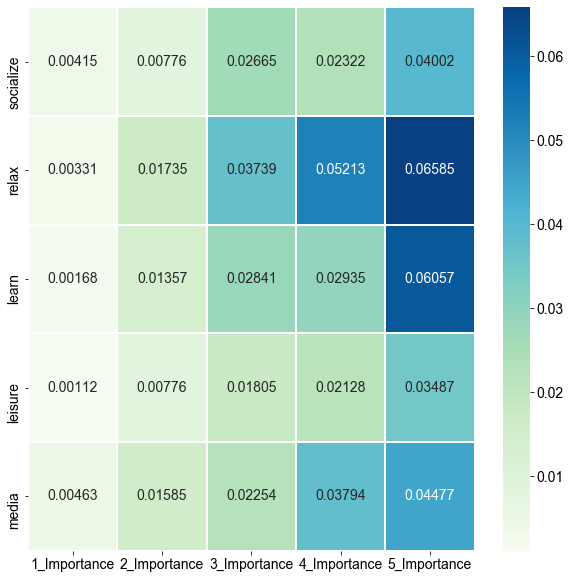

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['font.size'] = '14'
plt.figure(figsize=(10,10))
sns.heatmap(data=dfnew,linewidths=1,annot=True,cmap="GnBu",fmt=".5f")
plt.savefig("2.9宽深-value生活.png",dpi=300)

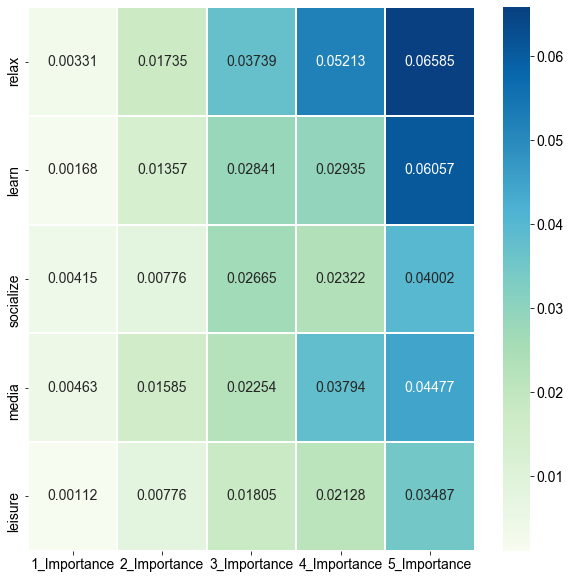

In [35]:
dfnew=dfnew.sort_values(by="3_Importance",ascending=False)
dfnew=dfnew[:10]
plt.figure(figsize=(10,10))
sns.heatmap(data=dfnew,linewidths=1,annot=True,cmap="GnBu",fmt=".5f")
plt.savefig("2.9宽深value_排序前10个生活.png",dpi=300)

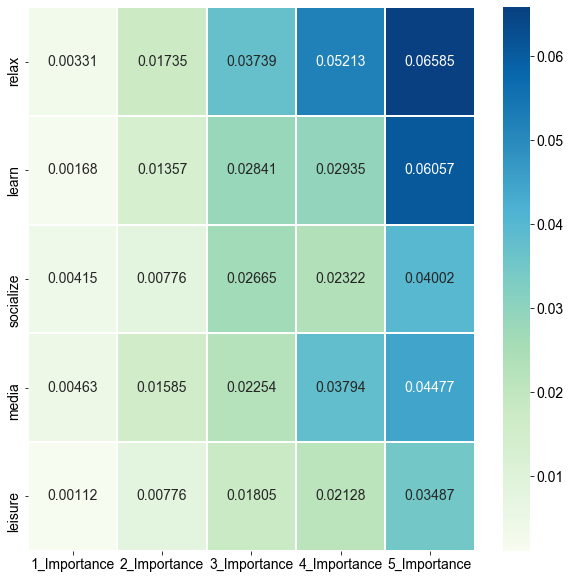

In [37]:
dfnew=dfnew.sort_values(by="3_Importance",ascending=False)
dfnew=dfnew[:10]
plt.figure(figsize=(10,10))
sns.heatmap(data=dfnew,linewidths=1,annot=True,cmap="GnBu",fmt=".5f")
plt.savefig("2.12宽深value_排序前10个生活.pdf",dpi=300)

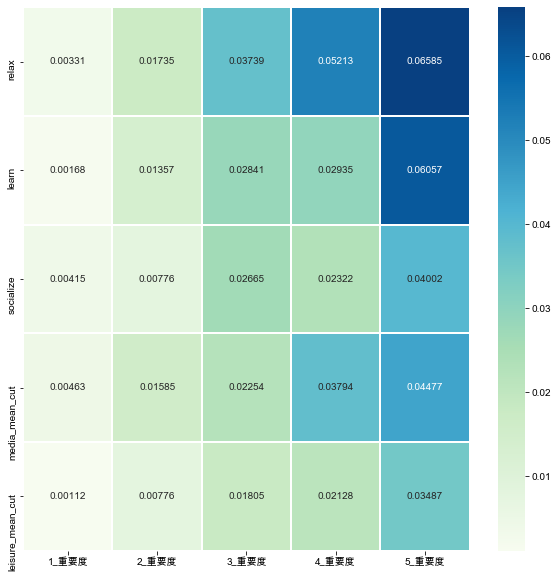

In [20]:
dfnew=dfnew.sort_values(by="3_Importance",ascending=False)
dfnew=dfnew[:5]
plt.figure(figsize=(10,10))
sns.heatmap(data=dfnew,linewidths=1,annot=True,cmap="GnBu",fmt=".5f")
plt.savefig("2.9宽深value_排序前5个生活.png",dpi=300)

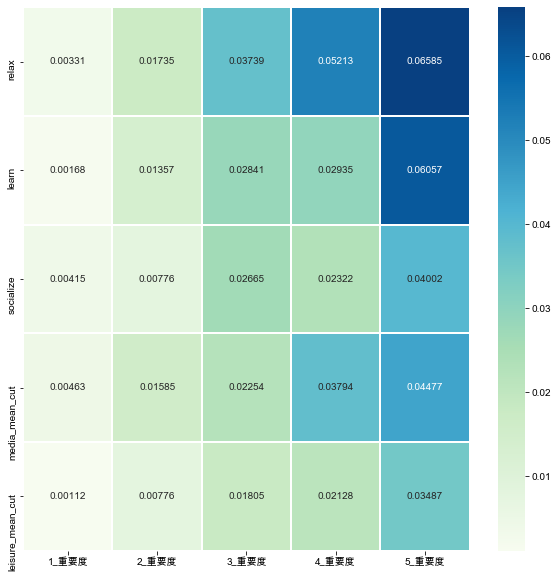

In [21]:
dfnew=dfnew.sort_values(by="3_Importance",ascending=False)
dfnew=dfnew[:5]
plt.figure(figsize=(10,10))
sns.heatmap(data=dfnew,linewidths=1,annot=True,cmap="GnBu",fmt=".5f")
plt.savefig("2.9宽深value_排序前5个生活.pdf",dpi=300)

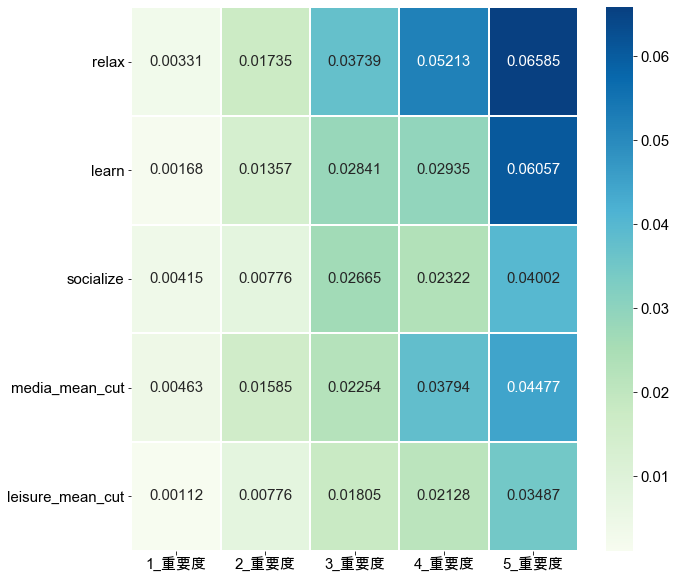

In [23]:
dfnew=dfnew.sort_values(by="3_Importance",ascending=False)
dfnew=dfnew[:5]
plt.figure(figsize=(10,10))
 
sns.heatmap(data=dfnew,linewidths=1,annot=True,cmap="GnBu",fmt=".5f")
plt.savefig("2.9宽深value_排序前5个生活大字.pdf",dpi=300,bbox_inches='tight')